<a href="https://colab.research.google.com/github/pedrofernandss/CIS_3Periodo/blob/main/CIS_3Periodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Análise Exploratória

In [2]:
#Importando a base de dados que será utilizada
creditCard = pd.read_csv("/content/drive/MyDrive/CIS_3Periodo/creditcard.csv")
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
#Verificando se há elementos vazios
creditCard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
#Realiza uma contagem de quantos itens cada classificação possui
creditCard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
fraudes = creditCard[creditCard.Class == 1]
normal = creditCard[creditCard.Class == 0]

Devido ao desbalanceio do dataset, vamos criar um "novo" dataset que contenha todas as transações fraudulentas e 2 mil transações normais.

Este valor discrepante tem como objetivo manter a característica de que é pouco comum que ocorram transações fraudulentas.

In [6]:
#Definindo que meu dataset contenha todas as fraudulentas e a mesma quantidade para não fraudulentas
newCreditCard = pd.concat([fraudes, normal.loc[0:2000]], axis = 0)
newCreditCard = shuffle(newCreditCard)

In [7]:
newCreditCard["Class"].value_counts()

0    1999
1     492
Name: Class, dtype: int64

In [8]:
x = np.array(newCreditCard.drop(['Class'], axis = 1))
y = np.array(newCreditCard["Class"])

In [9]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.2, random_state=0)

#Neural Network from Scratch

A rede neural mais simples existente é conhecida como Perceptron. O perceptron é dividido em três partes:


1.   Camada de Input
    *   Aquela que recebe as informações do dataset ou usuário

2.   Camada Oculta
    *   Responsável por realizar o processamento das informações fornecidas

3.   Camada de Output
    *   Aquela que entrega o resultado após o processamento

Ao receber as informações, a camada oculta realiza uma série de etapas para chegar ao resultado. Com as informações obtidas, o algoritmo estima um valor de importância **(peso)** de determinada informação para entender como ela impacta o resultado. Após isso, também é implementado o que é chamado de bias e funções de ativação, que tem como objetivo introduzir não-linearidades o que ajuda a rede neural a aprender e identificar padrões mais complexos nos dados. Esse processo é iterado para todos os neurônios de todas as camadas seguintes, até que a última camada exprima o resultado do algoritmo.

Segue abaixo, uma imagem mais representativa do texto a cima e do que é feito nos dois blocos de código abaixo:

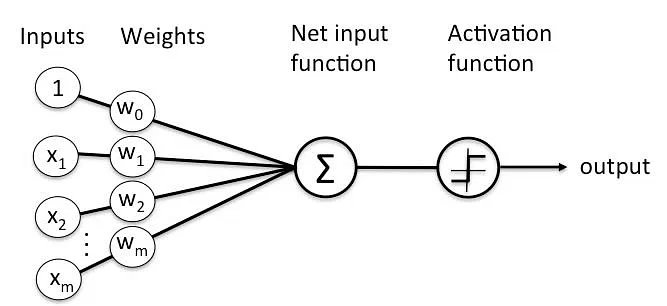

In [ ]:
class Inicio(): #Define as propriedades de uma camada única, caso deseja-se mais de uma é só ir alterando os valores de inputs
  def __init__(self):
    pass

  def pesos_biases(self, n_inputs, n_neuronios): #Define a o num. de dados do input e o num. de neurons da camada oculta

    pesos_camada_hidden = np.random.randn(n_neuronios, n_inputs.shape[0]) #Gera uma matriz de dimensão n_inputs (linhas) n_neurons (colunas). Composta por valores aleatórios normalizados
    biases_camada_hidden = np.zeros((1, n_neuronios)) #Inicia uma matriz de 0's de dimensão 1 (linha) e n_neurons (colunas)

    pesos_camada_output = np.random.randn(n_neuronios, n_inputs.shape[0]) #Gera uma matriz de dimensão n_inputs (linhas) n_neurons (colunas). Composta por valores aleatórios normalizados
    biases_camada_output = np.zeros((1, n_neuronios)) #Inicia uma matriz de 0's de dimensão 1 (linha) e n_neurons (colunas)

    dic_pesos_biases = {"pesos_camada_hidden": pesos_camada_hidden, "biases_camada_hidden": biases_camada_hidden, "pesos_camada_output": pesos_camada_output, "biases_camada_output": biases_camada_output}
    return dic_pesos_biases

In [ ]:
class Forward():
  def __init__(self):
    pass

  def ativacao_sigmoide(self, saida): #Define a função de ativação dos output
      return 1/(1+np.exp(-saida))

  def propagacao_direta(self, inputs, dic_pesos_biases): #Realiza a propagacao direta dos dados do input
    saida1 = np.dot(inputs, dic_pesos_biases['pesos_camada_hidden']) + dic_pesos_biases['biases_camada_hidden'] #input vezes peso + bias
    saida1_ativada = self.ativacao_sigmoide(saida1)

    saida2 = np.dot(saida1, dic_pesos_biases['pesos_camada_output']) + dic_pesos_biases['biases_camada_output'] #input vezes peso + bias
    saida2_ativada = self.ativacao_sigmoide(saida2)

    saidas = {'saida1': saida1 ,"saida2": saida2 , "saida1_ativada": saida1_ativada , "saida2_ativada": saida2_ativada}
    return saida2_ativada, saidas

Após esse procedimento, é comparado os resultados obtidos (previstos) com os resultados verdadeiros. O resultado dessa comparação é denominado de "Perda".

A fim de diminuir esse valor de perda, realizamos a backpropagation (propagação contrária).

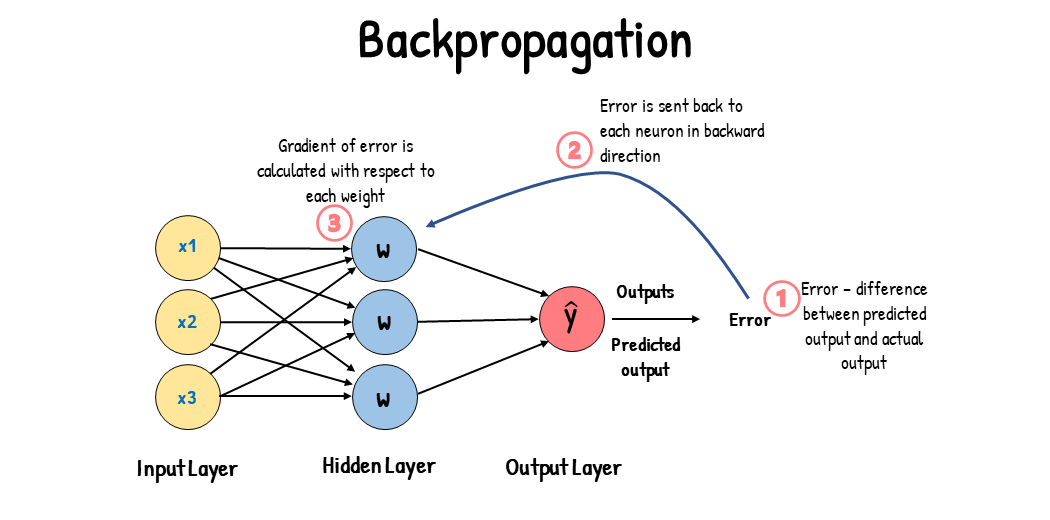


Na backpropagation aplicamos a diferença entre o previsto e o verdadeiro, na derivada da função de ativação para podermos enviar os erros obtidos aos neurônios anteriores e por fim, atualizar os valores de pesos e bias para tentarmos chegar ao nosso objetivo, o menor valor de perda possível. Basicamente, fazemos o processo inverso do realizado na etapa anterior. Esse cálculo é chamado de gradiente descendente e é realizado inúmeras vezes (épocas).

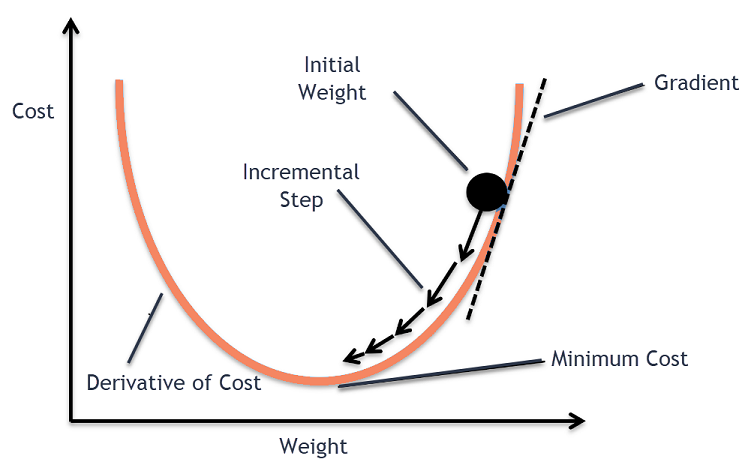



In [ ]:
class Perda():
  def calculate(self, output_active, y): #Recebe os outputs rede e os valores verdadeiros (y) como entrada
    perdas_amostras_individuais = self.forward(output_active, y) #Calcula as perdas individuais para cada exemplo
    data_loss = np.mean(perdas_amostras_individuais) #Calcula a média das perdas individuais
    return data_loss

class Loss_CategoricalCrossentropy(Perda):
  def forward(self, y_pred, y_true): #Recebe as previsões (y_pred) e os valores verdadeiros (y_true)
    samples = len(y_pred)
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7) #Garantir que os valores previstos estejam dentro de um intervalo específico

    if len(y_true.shape) == 1: #Apenas os índices das classes
      confiancas_corretas = y_pred_clipped[range(samples), y_true]
    elif len(y_true.shape) == 2: #Para situações em que os valores sofreram o One-Hot Encoder
      confiancas_corretas = np.sum(y_pred_clipped*y_true, axis=1)

    perda_amostras_individuais = -np.log(confiancas_corretas) #Calcula a perda para cada exemplo individual

    return perda_amostras_individuais

In [ ]:
class Backward():
  def __init__(self):
    pass

  def backpropagation(self, saidas, dic_pesos_biases, y_true):
    n_neuronios = 29

    loss_calculator = Loss_CategoricalCrossentropy()  # Instanciar a classe de cálculo de perda
    perdas_amostras_individuais = loss_calculator.forward(saidas['saida2_ativada'], y_true)  # Calcular as perdas individuais da ultima camada
    diferenca = perdas_amostras_individuais

#Para os pesos multiplicamos esse "Diferença mínima" pela primeira camada transposta (aplicada na função de ativação) e dividimos pela quantidade de neurônios
    novos_pesos_camada_op = (diferenca*saidas['saida2_ativada'])/n_neuronios
#Para os bias tiramos a média dessa diferença
    novos_biases_camada_op = (np.sum(diferenca, keepdims=True)) #Vale ressaltar que o "keepdims" mantém em formato de array

    derivada_c1 = np.multiply(np.dot(dic_pesos_biases["pesos_camada_output"].T, novos_pesos_camada_op), 1 - np.power(saidas["saida1_ativada"], 2))
    derivada_peso1 = (1/n_neuronios)*np.dot(derivada_c1, x.T)
    derivada_biases1 = (1/n_neuronios)*np.sum(derivada_c1, keepdims=True)

    gradientes = {"dp1": derivada_peso1, "db1": derivada_biases1, "dp2": novos_pesos_camada_op, "db2": novos_biases_camada_op}

    return gradientes

In [ ]:
class Gradiente():
  def __init__(self):
      pass

  def descente(self, gradientes, dic_pesos_biases, learning_rate=0.01):
    p1 = dic_pesos_biases['pesos_camada_hidden']
    b1 = dic_pesos_biases['bias_camada_hidden']
    p2 = dic_pesos_biases['pesos_camada_output']
    b2 = dic_pesos_biases['bias_camada_output']

    dp1 = gradientes['dp1']
    db1 = gradientes['db1']
    dp2 = gradientes['dp2']
    db2 = gradientes['db2']

    w1 = p1 - learning_rate * dp1
    b1 = b1 - learning_rate * db1
    w2 = p2 - learning_rate * dp2
    b2 = b2 - learning_rate * db2

    dic_pesos_biases = {"pesos_camada_hidden": w1, "bias_camada_hidden": b1, "pesos_camada_output": w2, "bias_camada_output": b2}

    return dic_pesos_biases

Por fim, apenas definimos a classe Perceptron (nossa principal) em que instanciamos as demais classes de inicialização, cálculo de perda, backpropagation e calculo de gradiente descendente.

In [ ]:
class Perceptron():
  def __init__(self):
      pass

  def fit(self, x_treinamento, y_treinamento, epocas):
    n_features = x_treinamento.shape[1]
    inicializacao = Inicio()
    perda = Perda()
    self.dic_pesos_biases = inicializacao.pesos_biases(x_treinamento, n_features)

    pesos_hidden = self.dic_pesos_biases['pesos_camada_hidden']
    biases_hidden = self.dic_pesos_biases['biases_camada_hidden']
    pesos_output = self.dic_pesos_biases['pesos_camada_output']
    biases_output = self.dic_pesos_biases['biases_camada_output']

    forward = Forward()
    backward = Backward()
    gradiente = Gradiente()

    for i in range(0, epocas):
      saida2_ativada, saidas = forward.propagacao_direta(x_treinamento, self.dic_pesos_biases)
      total_error = perda.calculate()
      if((i % 10 == 0)or(i == 1)):
        print(f"Epoch {i} - Total error: {total_error} \n Accuracy: {((1-total_error)*100):.2f}%")

      gradientes = backward.backpropagation(saidas, self.dic_pesos_biases, y_true)
      self.dic_pesos_biases = gradiente.descente(gradientes, self.dic_pesos_biases, learning_rate=0.01)

    return self.dic_pesos_biases

  def prediction(self, x_teste):
    forward = Forward()
    saida2_ativada, saidas = forward.propagation(x_teste, self.dic_pesos_biases)
    predictions = np.round(saidas["saida2_ativada"])

    return predictions

Não consegui executar o meu código devido a um problema de dimensões de array o qual não consegui solucionar, mas deixarei minhas análises e conclusões logo abaixo

# Tensorflow

Vamos utilizar a biblioteca tensorflow para a criação de uma rede neural com 1 camada de input com 29 neurônios, 1 camada oculta com 14 neurônios e 1 camada de saída com apenas 2 neurônios. Em todas, foi utilizada a função de ativação sigmóide

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
model = Sequential([
    Dense(30, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(2, activation='sigmoid')])

Para se calcular o valor de perda, vamos utilizar o 'sparse_categorical_crossentropy' onde as classes são representadas por números inteiros ao invés de One-Hot

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Vamos pegar uma amostra de 2000 dados do nosso dataset, realizar 50 épocas e separar 20% para destes dados para validação do nosso treinamento

In [33]:
historico =  model.fit(x_treinamento, y_treinamento, epochs=50, batch_size=1992, validation_split = 0.2)

Epoch 1/50
1/1 [==============================] - 1s 945ms/step - loss: 1.0921 - accuracy: 0.1984 - val_loss: 1.0772 - val_accuracy: 0.1930
Epoch 2/50
1/1 [==============================] - 0s 44ms/step - loss: 1.0709 - accuracy: 0.1984 - val_loss: 1.0561 - val_accuracy: 0.1930
Epoch 3/50
1/1 [==============================] - 0s 46ms/step - loss: 1.0501 - accuracy: 0.1984 - val_loss: 1.0354 - val_accuracy: 0.1930
Epoch 4/50
1/1 [==============================] - 0s 61ms/step - loss: 1.0298 - accuracy: 0.1984 - val_loss: 1.0152 - val_accuracy: 0.1930
Epoch 5/50
1/1 [==============================] - 0s 40ms/step - loss: 1.0099 - accuracy: 0.1984 - val_loss: 0.9955 - val_accuracy: 0.1930
Epoch 6/50
1/1 [==============================] - 0s 61ms/step - loss: 0.9904 - accuracy: 0.1984 - val_loss: 0.9763 - val_accuracy: 0.1930
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 0.9714 - accuracy: 0.1984 - val_loss: 0.9575 - val_accuracy: 0.1930
Epoch 8/50
1/1 [==========

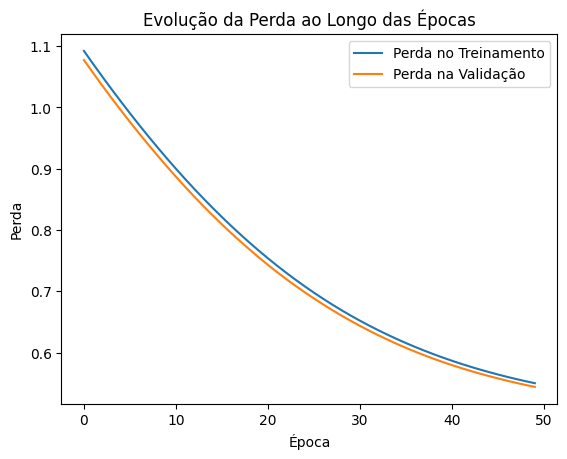

In [34]:
plt.plot(historico.history['loss'], label='Perda no Treinamento')
plt.plot(historico.history['val_loss'], label='Perda na Validação')
plt.title('Evolução da Perda ao Longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

Ao observar o gráfico de uma função de custo, verifica que seu valor diminui com o passar das épocas, o que significa que o modelo está aprendendo.

Entretanto, um baixo valor de perda pode indicar que o modelo aprendeu ao pé da letra e não possui uma boa capacidade de generalização.


In [35]:
score = model.evaluate(x_teste, y_teste)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.8016
Test loss: 0.5465646386146545
Test accuracy: 0.8016031980514526


Ao realizar uma avaliação, podemos verificar que o teste de acurácia permanecesse bem próximo daquele encontrado no treinamento. Conclui-se, assim, que houve um bom desempenho da rede neural.